<h2> Ćwiczenia 9 </h2>

<h4> Wykonywanie obliczeń na danych przestrzennych </h4>

Na dzisiejszych ćwiczeniach zapoznamy się z metodami pozyskiwania użytecznej informacji z różnych typów danych przestrzennych w ramach funkcjonalności wykraczających poza możlwiości QGISa w jego standardowym zastosowaniu.

<h4> Kalkulator pól </h4>

Jednym z przydatnych narzędzi GIS jest kalkulator pól. Pozwala on na obliczanie wartości w wierszach na podstawie wartości z pozostałych kolumn lub atrybutów warstwy.



Najpierw spójrzmy jak działa kalkulator pól w QGIS:

Na początku wczytujemy warstwę i otwieramy tabelę atrybutów. Dla przykładu otworzymy warstwę strefy_ABC_lotnisko (dołączona do ćwiczeń)

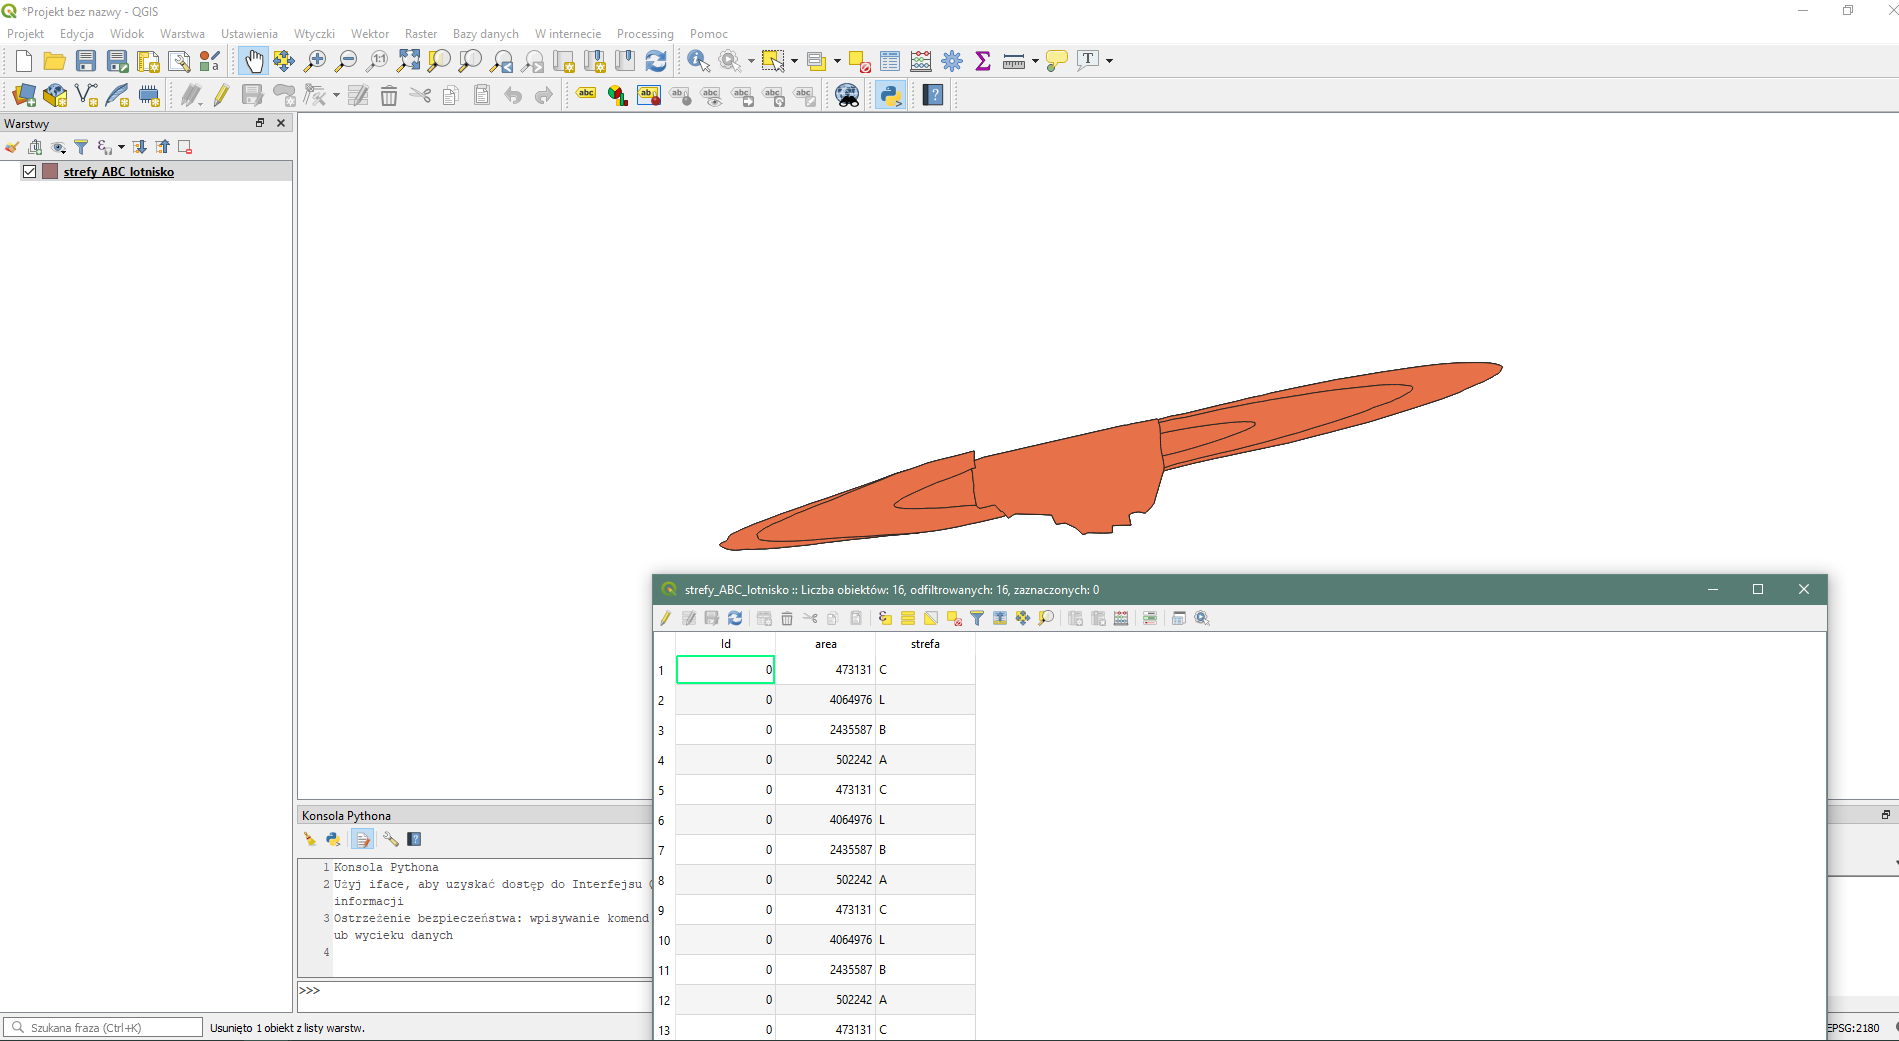

In [2]:
from IPython.display import Image
Image("1.png", width=600)

Następnie otwieramy "Kalkulator pól"

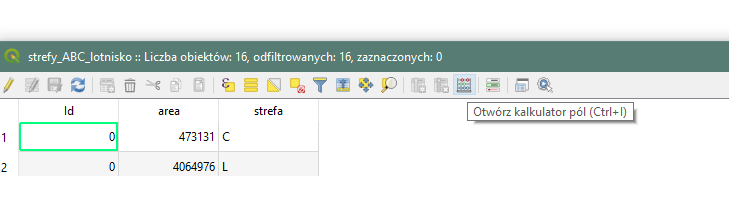

In [3]:
Image("2.png", width=600)

W nowym oknie możemy ustalić kilka parametrów:

    Dodanie nowego pola czy akutalizacja już istniejącego
    
    Jeśli dodanie nowego pola -> typ danej i jej długość (liczba znaków) i w przypadku liczby zmiennoprzecinkowej liczba miejsc po przecinku

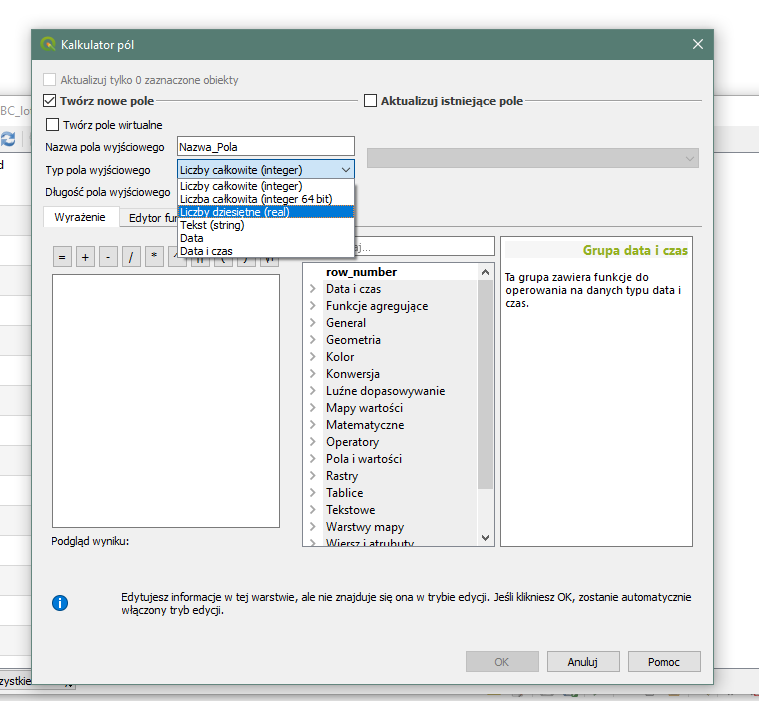

In [5]:
Image("3.png", width=600)

Poniżej znajdują się trzy okna. Idąc od lewej:

    Pole wyrażenia -> tu wpisuje się funkcję, która zostanie wywowała
    
    Pole funkcji -> stąd można wyszukać funkcje które możemu użyć, w tym nazwy pól, operatory geometryczne itd.
    
    Pole podpowiedzi -> krótki opis funkcji wybranej w polu funkcji.
    
    
Wpiszmy funkcję, która podzieli pole "area" przez 1000. Wynik zapisywany jest do nowego pola.

Poniżej widać, że w podpowiedziach "Pola i wartości" widzimy nazwy dostępnych pól

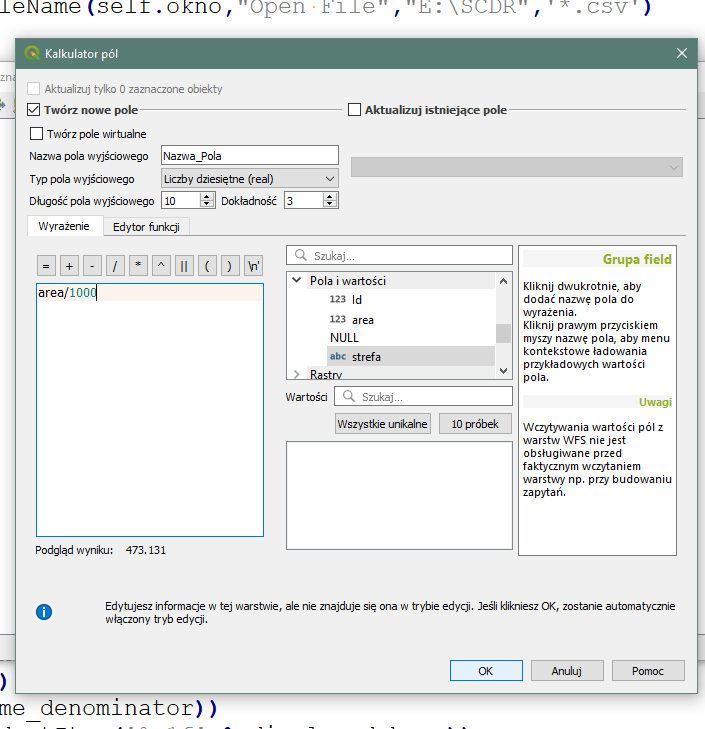

In [6]:
Image("4.png", width=600)

Po wybraniu "OK" funkcja wykonuje się i dodaje nowe pole z obliczonymi wartościami do tabeli atrybutów warstwy.

Tryb edycji włącza się automatycznie, można go wyłączyć i zapisać stan.

GOTOWE!

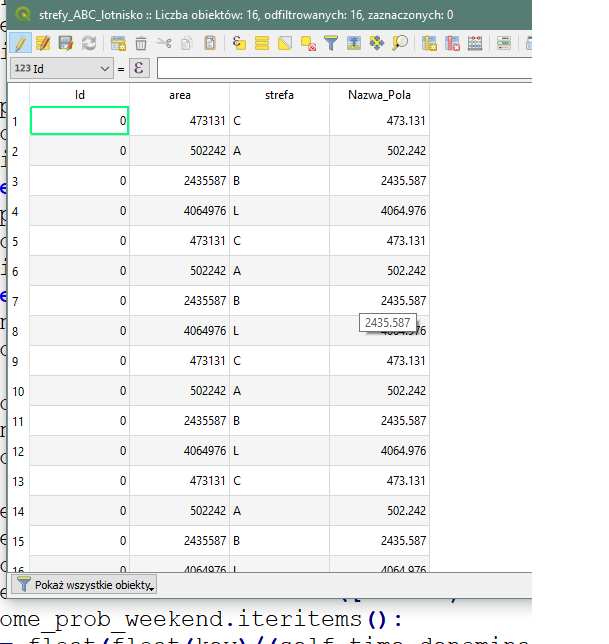

In [7]:
Image("5.png", width=600)

Można również korzystać z operatorów geometrycznych, np.

pole -> $area

długość -> $length

Więcej operatorów znajdziemy w oknie funkcji

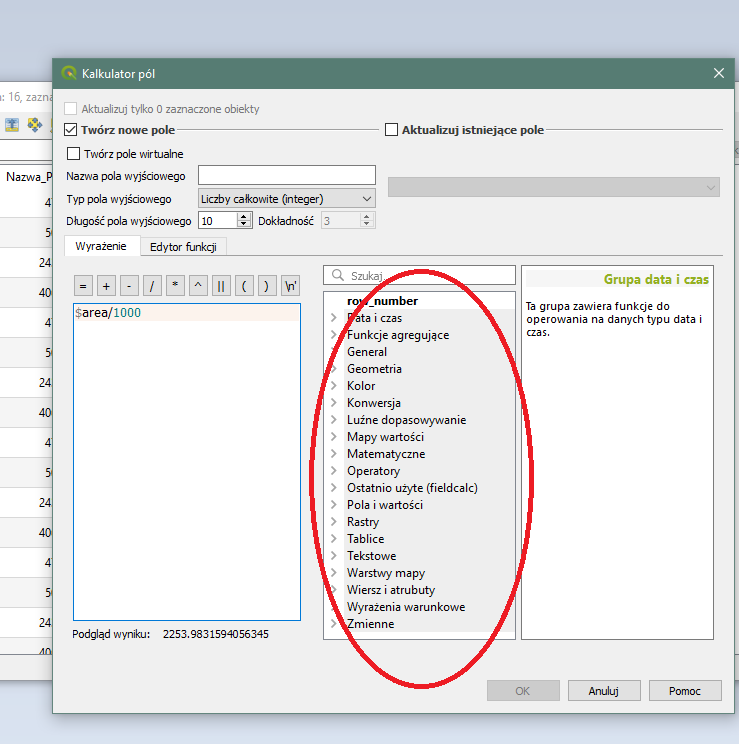

In [8]:
Image("6.png", width=600)

<h3> Ok, teraz zróbmy to samo za pomocą Pythona! </h3>

Najpierw podczytamy sobie warstwę, załóżmy że mamy ją już w QGIS, więc odwołujemy się przez iface

In [ ]:
warstwa = iface.activeLayer()

Następnie dostajemy się do dataProvider żeby móc edytować warstwę, czyli w tym przypadku dodać nowe pole:

In [ ]:
pr = warstwa.dataProvider()

Dodajemy nowe pole metodą klasy dataProvider - add.Attributes (zupłenie jak addFeatures - dodawanie obiektów do warstwy, ale tym razem dodajemy pole danych!)

Przyjmuje jako argument listę pól. A pole definiujemy jako klasę QgsField (już  wspomniana na wykładzie), która składa  się z (minimalnie) nazwy oraz typu zmienej. Typ zmiennej definiowany jest jako klasa QVariant. Double to liczba zmiennoprzecinkowa.

In [ ]:
pr.addAttributes([QgsField("Nazwa",QVariant.Double)])
warstwa.updateFields() #pamiętamy o odświeżaniu!

Typy QVariant znajdziemy oczywiście w dokumentacji (dokumentacji Qt, nie QGIS API!):

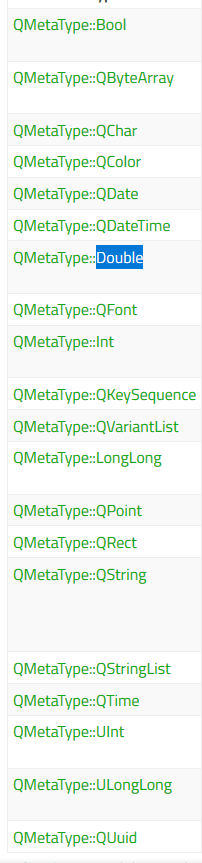

In [4]:
Image('7.png')

Teraz dla każdego obiektu, możemy ustalić nową wartość utworzonego pola przy pomocy pozostałych pól:

In [ ]:
for obiekt in warstwa.getFeatures(): #iterujemy się przez obiekty
    obiekt.setAttribute(obiekt.fieldNameIndex('Nazwa'),obiekt['area']/1000) 
    warstwa.updateFeature(obiekt)  #Każdy obiekt odświeżamy!

Dla obiektu w iteracji ustalamy wartość atrybutu metodą setAttribute. Metoda jako argument nr 1) przyjmuje współrzędne pola, którego wartość ma zmieniać, a jako drugi argument - wartość.

Wykorzystujemy metodę fieldNameIndex, które te współrzędne określa, należy podać tylko nazwę kolumny. 
    
Podajemy wartość, która ma zostać wprowadzone w pole z argumentu nr 1. Tym razem jest to wartość kolumny "area" dzielona przez 1000.

Możemy zrobić to samo, korzystając z powierzchni będącej atrybutem obiektu warstwy:

In [ ]:
for obiekt in warstwa.getFeatures(): #iterujemy się przez obiekty
    obiekt.setAttribute(obiekt.fieldNameIndex('Nazwa'),obiekt.geometry().area()/1000) 
    warstwa.updateFeature(obiekt)  #Każdy obiekt odświeżamy!

<h3> Czas na zadanie, którego nie da się wykonać nieprogramistycznie! </h3>

Zadanie będzie praktyczne i nie pokażę poniżej kompletnego rozwiązania.

Na początku dodajemy do QGIS plik "Cwiczenia9_warstwa.shp"

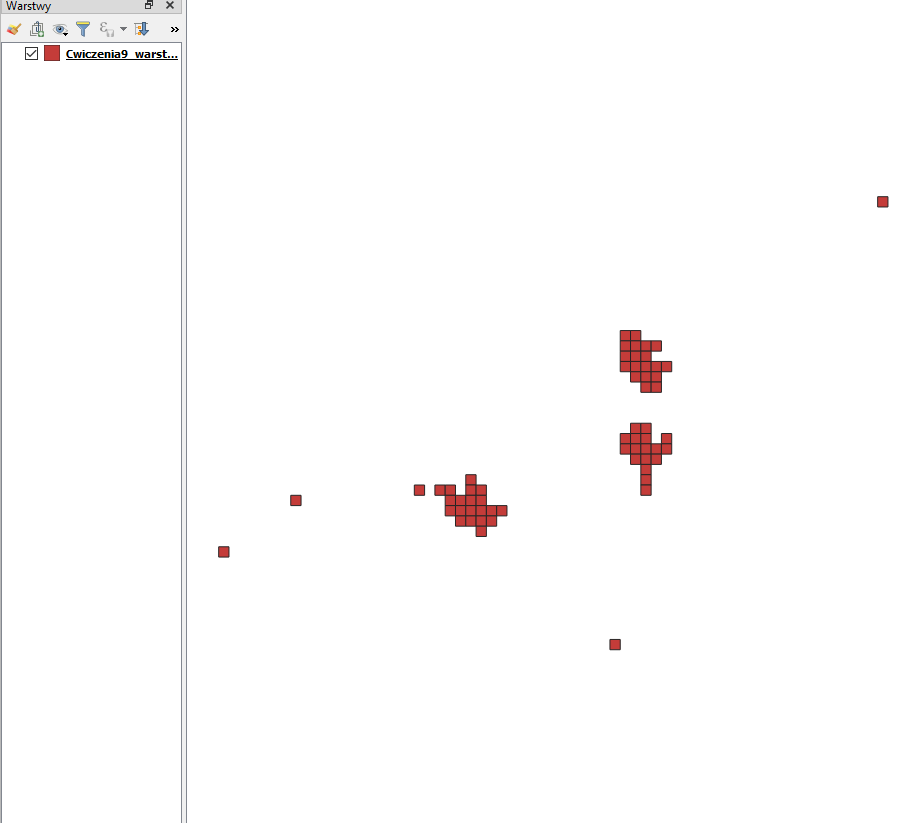

In [5]:
Image('8.png')

Warstwa to siatka agregacji zliczeń wystąpienia radzkiego gatunku ptaka na obszarze Szkocji. Celem jest obliczenie prawdopodobieństwa występowania tych ptaków w danej lokacji.

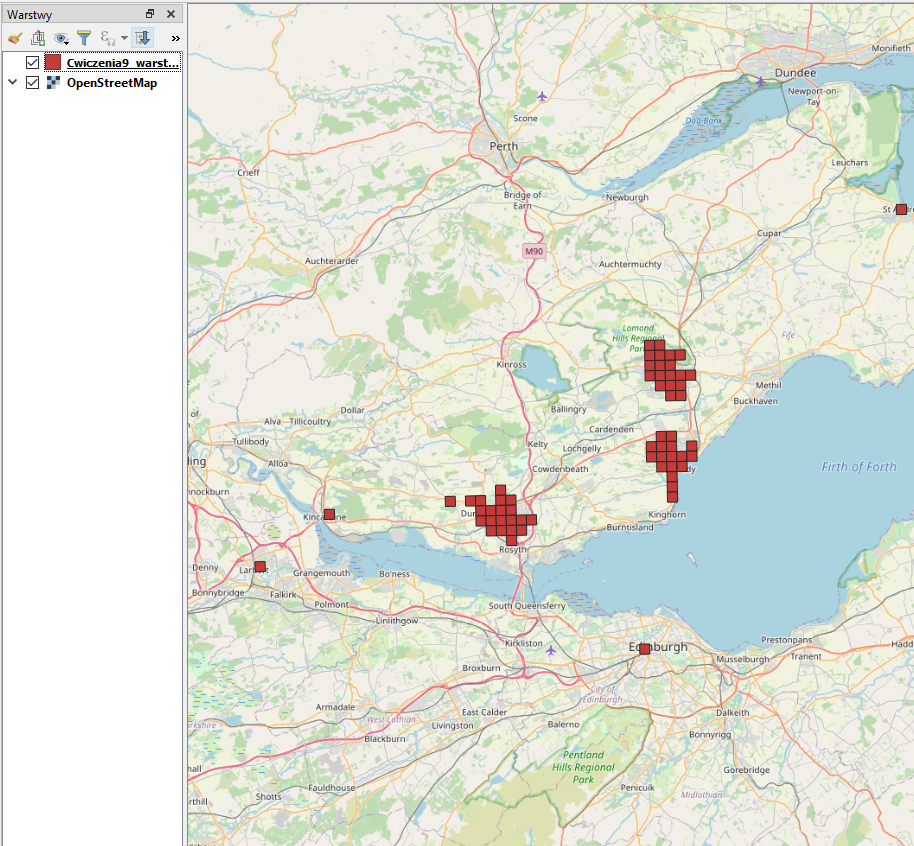

In [6]:
Image('9.png')

Warstwa składa się z pól:

    id - identyfikator
    xmin,xmax,ymin,ymax - współrzędne naróżników
    NUMPOINTS - liczba wystąpień ptaków
    
Prawodpodobieństwo wystąpienia to stosunek częstości wystąpienia ptaka w danym miejscu w stosunku do całkowitej populacji ptaków (czyli sumy zliczeń).

<b>Uwaga: suma prawdopodobieńst powinna się równać jedności.

Należy napisać skrypt, który w warstwie \"Ćwiczenia9_warstwa.shp\" stworzy kolumnę o nazwie \"P\" typu Double, która będzie zawierała prawdopodobieństwo wystąpienia obecności obserwowanych gatunków ptaków.

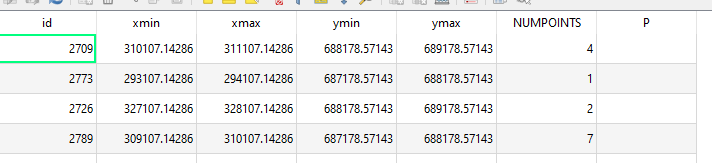

In [7]:
Image('10.png')

Teraz należy obliczyć prawdopodobieństwo. Wynik przesdstawiam po posortowaniu wartości po kolumnie "id".

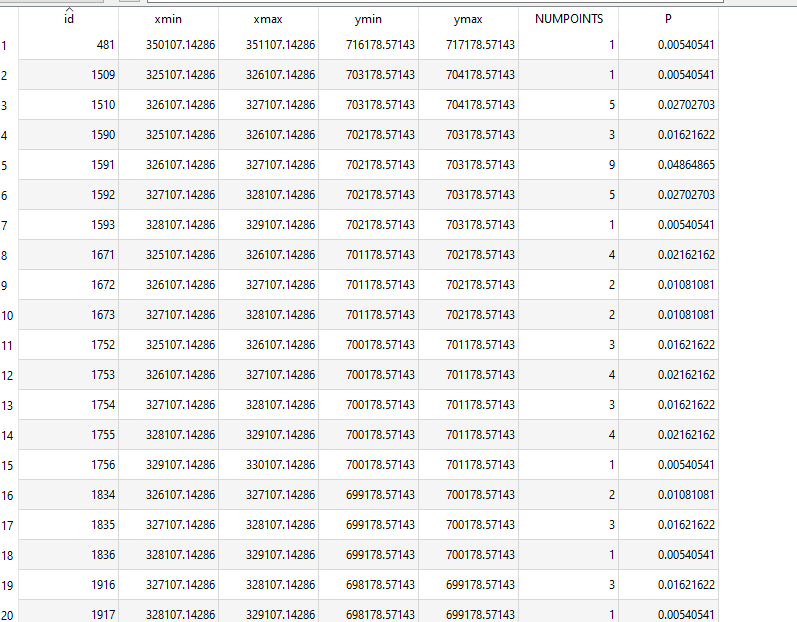

In [8]:
Image('11.png')

Dodatkowo należy sprawdzić, czy wartości prawdodobieństwa równają się jedności. Wynik wyświetl do konsoli. Niestety ze względu na dokładność pola, wynik może wyjść nieznacznie różny od zera. Jest to akceptowalne.

In [9]:
Image('12.png')

<h3> Czas na kolejne zadanie! </h3>

Tym razem nie będziemy już korzystać z kalkulatora. Wykonany kilka przykładów  innych operacji na danych przestrzennych za pomocą Pythona, by zdobyć pewne wartościowe informacje.

Warstwa "ślady" zawiera dane zgromadzone przy pomocy rejestratora GPS - pozycje odczytywane co 10 sekund. W danych zarejestrowana jest jedna wycieczka - częściowo samochodem, częściowo pieszo. Warstwa zawiera kolumny:

    INDEX - indeks danych
    
    TIME - czas rejestracji
    
    HEIGHT - wysokość punktu n.p.m.
    
PS. Powinniście pamiętać ten typ danych z zajęć SIP II.

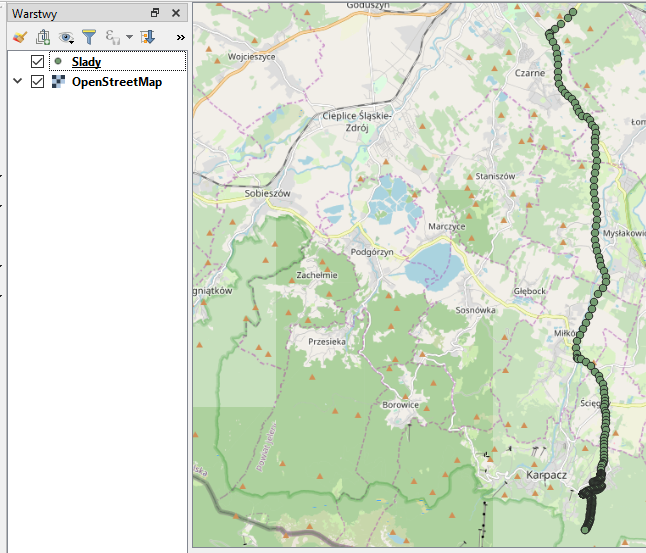

In [10]:
Image('13.png')

<h3> Zadania </h3>
    
    1. Oblicz całkowity czas trwania wycieczki w sekundach
    
    2. Oblicz sumę przewyższeń zarejestrowanych w śladzie
    
    3. Oblicz ile czasu zajęłoby pokonanie całej trasy, gdyby poruszać się ze średnią prędkością 18km/h (wynik podaj w godzinach, minutach i sekundach gg:mm:ss)
    

<b> Zadanie 1 </b>

Do zadania 1 wykorzystamy pole "TIME", które jest polem tekstowym. Możemy je transformować na typ danej czasu lub dokonać operacji bezpośredno na tekście zrzutowanym na liczbę. Druga wersja nie wymaga wykorzystania bibliotek (pierwsze rozwiązanie jest lepsze i szybsze, ale zrobimy nr 2).

Wybierzemy wartość najwyższą i najniżsżą a następnie obliczymy różnicę czasu.

Na początku wybierzmy wszystkie dane za pomocą wyrażenia listowego. Wybieram tylko czas bo data jest ta sama:

In [ ]:
x = [feat['TIME'].split(' ')[1] for feat in warstwa.getFeatures()]

Następnie sortujemy dane:

In [ ]:
x = sorted(x) #polecam funkcję sorted

Wybieramy pierwszy i ostatni zarejestrowany czas i rozbijamy go na godziny, minuty i sekundy (w tym momencie moglibyśmy też skorzystać z biblioteki datetime i wykorzystać typ zmiennej "czas" z innej bilbioteki Pythona).

In [ ]:
first_x = x[0].split(':')
last_x = x[-1].split(':')

Zamieniamy dane z tekstowych na liczbowe. Można to zrobić wprost:

In [ ]:
first_x = [int(x) for x in first_x]
last_x = [int(x) for x in last_x]

Lub bardzo przydatną funkcją wbudowaną Pythona (nie omawiałem jej wcześniej!) map()

In [ ]:
first_x = map(int,first_x)
last_x = map(int, last_x) #zwracają iteratory nie listy

teraz musimy odjąć godziny, minuty i sekundy od siebie. Ja skorzystam z funkcji wbudowanej Pythona zip(). Sprawdźcie w dokumentacji jak działa:

In [ ]:
wyniki = []
for x,y in zip(last_x,first_x):
    wyniki.append(x-y)
    
#Wynik: [1, -1, 15]



Jeszcze przeliczamy na sekundy:

In [ ]:
w_w_sekundach = 0
for w,t in zip(wyniki,mnoznik):
    w_w_sekundach += w*t
    
print(w_w_sekundach)

#Wynik: 3555

<b> Zadanie 2 </b>

Suma przewyższeń będzie wymagała od nas wykonania pewnego rodzaju "kroczącej" różnicy. Pole "HEIGHT" zawiera wysokości punktów, różnica pomiędzy dwoma następującymi po sobie punktami to właśnie przwyższenie. Za każdym razem więc należy obliczyć różnicę wysokości pomiędzy dwoma kolejnymi punktami.

Skorzystamy z wyrażenia słownikowego, by znać kolejność punktów:

In [ ]:
dane = {x['INDEX']: x['HEIGHT'] for x in warstwa.getFeatures()}

Zapiszmy sobie wartość najwyzsza i najnizsza identyfikatora:

In [ ]:
index_max = max(dane)
index_min = min(dane)

Teraz dokonajmy iteracji przez kolejne punkty w słowniku z wykorzystaniem klucza słownika (czyli atrybutu INDEX). Od razu będziemy obliczać różnicę wysokości:

In [ ]:
przewyzszenie = 0 #tu będziemy zapisywać przewyższenia
for pkt in range(index_min,index_max-1): #-1 bo patrzymy jeden punkt w przód
    przewyzszenie += dane[pkt+1] - dane[pkt] #i obliczamy różnice

Wynik: 367.67400000000004

<b> Zadanie 3 </b> - do wykonania własnego.

Aby obliczyć czas, który zajmie pokonanie trasy wystarczy policzyć długość trasy i podzelić ją przez prędkość. Istnieje jednak kilka trudności związanych z policzeniem długości trasy. Normalnie gdyby dane znajdowały się w układzie metrycznym, moglibysmy skorzystać z projestej metody pozyskiwania współrzędnych z danych x oraz y:

In [ ]:
dane = {pkt['INDEX']: (pkt.geometry().asPoint().x(),pkt.geometry().asPoint().y()) for pkt in warstwa.getFeatures()}


I dokonać iteracji przez słownik zapisująć odległości:

In [ ]:
index_max = max(dane)
index_min = min(dane)

 Przyda nam się też biblioteka math sqrt:


In [ ]:
dlugosc= 0 #tu będziemy zapisywać dlugosc
from math import sqrt
for pkt in range(index_min,index_max-1): #-1 bo patrzymy jeden punkt w przód
    dlugosc += sqrt((dane[pkt+1][0] - dane[pkt][0])**2 + (dane[pkt+1][1] - dane[pkt][1])**2) #obliczamy odleglosci

Wynik: 0.17645259708565295

A zatem otrzymaliśmy go w mierze stopniowej. Na poprzednich ćwiczeniach korzystaliśmy z klasy QgsDistanceArea(). A zatem o wiele prościej byłoby skorzystać z tej wlaśnie klasy.

Zatem zadaniem własnym jest skorzystać z tej klasy do obliczenia długości trasy i policzenia zadania nr 3.


<b> Zadanie opcjonalne </b>: oblicz prędkość średnią, minimalną i maksymalną obiektu.

<<h2> Zadanie nr 3 należy przesłać. </h2>

To tyle na dziś!